# FIT5196 Assessment 2

#### Student Name: PRASHANT JAJORIA
#### Student ID: 31187366

Date: 18/10/2020

Environment: Python 3.7.4 and Anaconda 4.8.4 (64-bit)

Libraries used:
1. **pandas** - for reading and writing CSV file, and manipulating Datafarme, included in Anaconda Python 3.7.4
2. **re** - for regular expression, included in Anaconda Python 3.7.4
3. **numpy** - for arithmetic operations and calculations on arrays, included in Anaconda Python 3.7.4
4. **matplotlib** - for visualizing data, included in Anaconda Python 3.7.4
5. **datetime** - for validating date, included in Anaconda Python 3.7.4
6. **math** - for using predefined mathematical functions, included in Anaconda Python 3.7.4
7. **nltk.sentiment.vader** - for identifying customer sentiment from the product review.
8. **sklearn.linear_model** - for making Regression model and prediction.

## Introduction
The main goal of this assessment is Data cleansing, before it can be used for any Data analysis process. Data quality problems like Missing data, Inconsistent and faulty data, Outliers and Duplicates are to be identified, analysed and recified.

Syntactical Anomalies involving format and issues in values; Semantic Anomalies involving comprehensiveness and redundancy; Coverage Anomalies involving missing values are to be effectively handled for the given data. 


Following are the requirement of the task:
1. Clean the Dirty data file by removing Syntactical Anomalies and Semantic Anomalies.
2. Fill in the missing data for Missing data file by using various techiques, sentiment analysis, appropriate Multiple Linear Regression models, etc.
3. Remove the outliers for the Delivery charges from the Outlier data file.

A step by step explanation of completing the requirements will be explained in the following code cells.

# TASK 1 : Dirty Data

### Import the Library

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime
import math

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression

### Read CSV

Read the Dirty data file using the `read_csv` file from Pandas library

In [4]:
df1 = pd.read_csv('31187366_dirty_data.csv') 
warehouses = pd.read_csv('warehouses.csv')

### Inspect the data

Lets check the first 5 rows using the `head` function to get a hang of the data provided.

In [5]:
df1.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD136980,ID4312130284,2019-01-21,nickolson,"[('Lucent 330S', 1), ('Alcon 10', 1), ('pearTV...",27120,76.85,-37.819926,144.992157,0,27196.85,Summer,False,1.1379,recommend great phone for the price highly rec...,True
1,ORD192951,ID4353912833,2019-03-19,Bakers,"[('pearTV', 2), ('Lucent 330S', 1), ('Alcon 10...",22800,85.35,-37.824404,145.012952,0,22885.35,Autumn,True,2.2362,my 90 year old mom loves that she can watch th...,True
2,ORD373330,ID1964021902,2019-09-13,Nickolson,"[('Olivia x460', 2), ('pearTV', 2), ('Lucent 3...",16300,72.65,-37.817966,144.966105,10,14742.65,Spring,True,0.3110,good price glass break to easy,True
3,ORD314505,ID0207093531,2019-02-21,Bakers,"[('iStream', 1), ('iAssist Line', 1), ('Univer...",9275,98.65,-37.800182,145.003224,15,7982.40,Summer,True,1.2991,five stars the best android phone now.,True
4,ORD330208,ID0711778924,2019-10-24,Thompson,"[('iAssist Line', 2), ('iStream', 1)]",4600,73.02,-37.815056,144.945178,5,4443.02,Spring,False,0.3130,good excelent,True


Lets look at the warehouse details given to us.

In [6]:
warehouses

,names,lat,lon
0,Nickolson,-37.818595,144.969551
1,Thompson,-37.812673,144.947069
2,Bakers,-37.809996,144.995232


### Look at the shape of Dataframe

In [7]:
df1.shape

(500, 16)

The shape of the Dataframe tell us that there are 500 rows i.e. orders and 16 columns i.e. order details

### Statistics for Numerical variables

Using the `describe` function to view some basic statistical details like percentile, mean, std etc. of the read CSV file.

In [8]:
df1.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,14076.980000,77.793560,-27.942141,135.097472,10.790000,12444.818880,1.168776
std,7973.141756,14.898392,41.352126,41.352982,8.524743,7162.719437,0.578576
min,580.000000,47.300000,-37.840654,-37.824364,0.000000,500.660000,0.026500
25%,8116.250000,66.077500,-37.817920,144.947373,5.000000,7028.950000,0.769350
50%,12642.500000,77.360000,-37.811857,144.964190,10.000000,11430.295000,1.133150
75%,19441.250000,86.122500,-37.804250,144.982954,15.000000,16863.025000,1.525325
max,46060.000000,116.050000,144.997298,145.018672,25.000000,46112.750000,3.210200


### Look at Datatypes

Lets have a look at the data type of the columns of the CSV file

In [9]:
df1.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object

### Statistics for Categorical variables

As decribe by default shows stastics for only numerical data. To see the statistics of Categorical data we use `include` parameter of `describe` to include Datatype of type Object i.e. categorical data.

In [10]:
df1.describe(include = ['O'])

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,500,500,500,500
unique,500,494,295,6,463,8,500
top,ORD350576,ID2481930658,2019-06-01,Thompson,"[('Thunder line', 1), ('Lucent 330S', 2)]",Spring,"perfect for basic stuff, games and media. read..."
freq,1,2,5,211,4,137,1


## Do we have duplicate customer_id ?

As the number of unique **customer_id** is 494 out of the total 500 orders, we need to check if the customer order is getting repeated.
To check for Duplicate, we look at the **customer_id**, **shopping_cart** and **latest_customer_review**.

In [11]:
df1[df1.duplicated(["customer_id", "shopping_cart","latest_customer_review"], keep=False)]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer


As we get no data for this query, we can say that the orders are not duplicate and are different orders.

## More than 3 warehouses ?

The count of unique warehouses returend was 6, so we need to check the warehouses values. As we only have 3 warehouses, there seems to be a problem here.

In [12]:
df1.nearest_warehouse.unique()

array(['nickolson', 'Bakers', 'Nickolson', 'Thompson', 'bakers',
       'thompson'], dtype=object)

We can see that the values of warehouses have been lower cased in some orders, giving us 6 warehouses.

### Function to check if warehouse name is incorrect

We know the correct value of the 3 warehouses, so we can define a check to see the values that have name of Warehouses other than the defined warehouses.

In [13]:
def check_incorrect_warehouses_name(warehouse_name):
    '''
    Function to check if warehouse name is from the 3 predefined warehouses.
    '''
    if warehouse_name not in ['Nickolson', 'Bakers', 'Thompson']:
        return True
    else:
        return False

In [14]:
df_incorrect_nearest_warehouse = df1[df1['nearest_warehouse'].apply(check_incorrect_warehouses_name)]

### Replace the lower case warehouse

Correcting the warehouses names, where the values are in lower case

In [15]:
df1.nearest_warehouse.replace({'nickolson':'Nickolson', 'bakers':'Bakers', 'thompson' : 'Thompson'}, inplace=True)

### Check after replace

In [16]:
df1.nearest_warehouse.unique()

array(['Nickolson', 'Bakers', 'Thompson'], dtype=object)

## Check the season

From the describe() function we got the number of unique values for season as 8, this tells us that there is a anamoly in some orders.

In [17]:
df1.season.unique()

array(['Summer', 'Autumn', 'Spring', 'Winter', 'autumn', 'summer',
       'spring', 'winter'], dtype=object)

We can see that some of the orders have been lower cased giving us 8 different values for season.

### Function to check if Season is incorrect

As we know the 4 seasons, we can define a check for finding flaws in season column.

In [18]:
def check_incorrect_season_name(season_name):
    '''
    Function to check if the season name is incorrect.
    '''
    if season_name in ['summer', 'spring', 'winter']:
        return True
    else:
        return False

In [19]:
df1[df1['season'].apply(check_incorrect_season_name)].shape

(12, 16)

There are 12 order that have season value that is in lower case.

In [20]:
df_incorrect_season = df1[df1['season'].apply(check_incorrect_season_name)]

### Replace with correct Season

Correcting the lower cased season name to proper values.

In [21]:
df1.season.replace({'summer':'Summer', 'autumn':'Autumn', 'spring' : 'Spring', 'winter' : 'Winter'}, inplace=True)

### Check after replace

In [22]:
df1.season.unique()

array(['Summer', 'Autumn', 'Spring', 'Winter'], dtype=object)

After correcting the values we get the correct number of seasons i.e. 4

## Check Date format

We know the Date format for order is **YYYY-MM-DD**.

### Check if Year is correct

As know the date format is **YYYY-MM-DD**, we can define a check for year, to see if first 4 numbers represent year or not.

In [23]:
def check_year(order_date):
    '''
    Function to check if the Year is the first part of YYYY-MM-DDD format or not.
    '''
    if len(order_date.split('-')[0]) != 4:
        return True
    else:
        return False

### Number of rows which have the DD-MM-YYYY format

Looking at the data which do not pass the check for year, we can see that they are in **DD-MM-YYYY** format.

In [24]:
df1[df1['date'].apply(check_year)].shape

(14, 16)

There are 14 row that are in **DD-MM-YYYY** format.

In [25]:
df_dd_mm_yyyy = df1[df1['date'].apply(check_year)]

### Check if Month is correct

As know the date format is **YYYY-MM-DD**, we can define a check for month, to see if first 6 and 7 digit represent month or not.

In [26]:
def check_month(order_date):
    '''
    Function to check if the Month is the second part of YYYY-MM-DDD format or not.
    '''
    if int(order_date.split('-')[1]) > 12:
        return True
    else:
        return False

### Number of rows which have the YYYY-DD-MM format

Looking at the data which do not pass the check for month, we can see that the date here is in **YYYY-DD-MM** format.

In [27]:
df1[df1['date'].apply(check_month)].shape

(13, 16)

There are 13 orders having date in **YYYY-DD-MM** format.

In [28]:
df1['date'].apply(check_month).describe()

count       500
unique        2
top       False
freq        487
Name: date, dtype: object

In [29]:
df_yyyy_dd_mm = df1[df1['date'].apply(check_month)]

### Fixing the Date Format issue

As we know the check conditions for both year and month, we can impute the order date that are not in **YYYY-MM-DD** format

In [30]:
def impute_date(order_date):
    '''
    Function to impute the incorrect date and make it in the YYYY-MM-DDD format.
    '''
    if len(order_date.split('-')[0]) != 4:
        dd,mm,yyyy = order_date.split('-')
        return yyyy + '-' + mm + '-' + dd
    
    elif int(order_date.split('-')[1]) > 12:
        yyyy,dd,mm = order_date.split('-')
        return yyyy + '-' + mm + '-' + dd
    else:
        return order_date

In [31]:
df1['date'] = df1['date'].apply(impute_date)

### Check the new Date column

### Check the year

Checking for errors in year after imputation.

In [32]:
df1[df1['date'].apply(check_year)]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer


### Check the month

Checking for errors in month after imputation.

In [33]:
df1[df1['date'].apply(check_month)]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer


### Validate the complete date

After correcting the year and month of the orders, we must check the complete validity of the Date. 

This can be done using **datetime** python module 

Defining a function to check if date is valid.

In [34]:
def is_valid_date(date):
    '''
    Validate the order_date after imputations.
    '''
    year = date.split('-')[0]
    month = date.split('-')[1]
    day = date.split('-')[2]
    
    try :
        datetime.datetime(int(year),int(month),int(day))
        return False
    except ValueError :
        return True

In [35]:
df1[df1['date'].astype(str).apply(is_valid_date)]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer


As we get no data for above query, we can be sure that all the dates are valid.

## Checking the Shopping Cart

### Find the names of all the Items of the shopping cart

We know that the store sells only 10 items, so we can check the shopping cart to see if the unique number of items is 10 or not.

Using regular expression to capture all the item names. The expression captures all the values that are in between single quotes.

Storing all the item names in a List.

In [36]:
list_items = []

def get_item_names(cart):
    '''
    Function to get item name of a shopping cart.
    '''
    for item in re.findall(r'\'(.*?)\'',cart):
        list_items.append(item)
        
    return re.findall(r'\'(.*?)\'',cart)

### Store the name of all the Itmes of shopping cart

Storing the shopping cart items as new column in dataframe.

In [37]:
df1['shopping_items'] = df1['shopping_cart'].apply(get_item_names)

### Names of 10 items

As we get the number of unique items as 10, we can be sure that the item name in the shopping cart are correct.

In [38]:
len(set(list_items))

10

### Store the item quantity ordered as new column

Defing a function to capture the item quantity of each shopping cart.

In [39]:
def get_item_qty(cart):
    '''
    Function to get item quantity of each of the items of a shopping cart.
    '''
    return list(re.findall(r'\(\'\w+\s?\d*\w*\',\s(.*?)\)',cart))

In [40]:
df1['shopping_item_qty'] = df1['shopping_cart'].apply(get_item_qty)

### Finding the price of each of the 10 items

The **order_total** column has the total price for an order. This price can be incorrect for some orders. To ensure we have correct value for each order, we need to get the individual price of each Item.

To get the price of each Item, I use Linear algebra. 

In this I am solving Linear equations in Two variables to get the price of Two items at a time.

In [41]:
lst = {}

dict_item_price = {}

lst_items_names = set(list_items)

# make a dict to store the price of the items
for item_name in list(lst_items_names):
    dict_item_price[item_name] = []

# Solve linear equation for each of the 2 combinations of the orders.
# first order
for index, row in df1.iterrows():
    
    # first eq coefficients
    a_coeff =  re.findall(r'\(\'\w+\s?\d*\w*\',\s(.*?)\)',row['shopping_cart'])    
    #print(a_coeff)
    
    # first equation RHS
    a_rhs = row['order_price']

    # make a adictionary to store the order_id of rows that have same type of order
    lst[row['order_id']] = []
        
    # get the name of all the items for current order
    lst_items = re.findall(r'\'(.*?)\'',str(row['shopping_items']))
    
    # second order
    for index2, row2 in df1.iterrows():
        
        # we check only for cart with two items
        if ((row['shopping_items'] == row2['shopping_items']) and len(row['shopping_items']) == 2 ):
            
            lst[row['order_id']] = lst[row['order_id']] + [row2['order_id']]
            
            # second equation coefficients
            b_coeff =  re.findall(r'\(\'\w+\s?\d*\w*\',\s(.*?)\)',row2['shopping_cart'])
            
            # second equation RHS
            b_rhs = row2['order_price']
            
            # go ahead if the 2 equations have same number of coefficients
            if (len(a_coeff) == len(b_coeff)):
                
                # 2 coefficients of the linear equation
                coeff = np.array([a_coeff, b_coeff],dtype='float')
                
                # constant on the RHS of the linear equation.
                rhs = np.array([a_rhs,b_rhs])
                
                # using try as we will get exceptions in case the coefficients 
                # are same for the two linear equations
                try:
                    # equation result
                    x = np.linalg.solve(coeff, rhs)
                except np.linalg.LinAlgError:
                    continue
                else:
                    # storing the price of the 2 items in a dictionary 
                    dict_item_price[lst_items[0]].append(x[0])
                    dict_item_price[lst_items[1]].append(x[1])

### Count of Prices of Each Items

After solving the Linear eauations, the Price of items we get is as a Dictionary storing the list of price for each of the 10 items.

Looking at the count of Price for each Item, we can find the correct item price of each of the 10 items.

The item price which has the maximum count will be the correct price for that item.

In [42]:
# Dictionary to store the final item prices
final_item_prices = {}

# traverse all the items
for item_name,values in dict_item_price.items():
    
    # creating dict of count of prices for each item 
    data = dict((x,dict_item_price[item_name].count(x)) for x in set(dict_item_price[item_name]))
    print(item_name,data)
    
    # get the maximum count of prices of each item stored in the dictionary. 
    max_count = max(data.values())
    
    # storing the correct item price in a new dictionary with key as Item name and value as the item price
    for key2,value in data.items():
        if value == max_count:
            final_item_prices[item_name] = key2

Candle Inferno {430.0: 22}
Olivia x460 {1225.0: 18, 7365.0: 2}
Lucent 330S {12770.0: 2, -4540.0: 8, 1230.0: 34, 17470.0: 2}
Toshika 750 {4320.0: 36, 5018.333333333333: 2, -1820.0: 2, -120.0: 2}
Alcon 10 {7553.333333333334: 2, -3640.0: 2, -310.0: 2, 8950.0: 30, -610.0: 4}
Universe Note {5670.0: 2, 8080.0: 2, 11475.0: 2, -6570.0: 4, 8825.0: 4, 3450.0: 26}
iStream {710.0: 2, -13690.0: 2, 9710.0: 4, 150.0: 40, -7970.0: 2}
Thunder line {27360.0: 2, 2180.0: 48, 6160.0: 2, 3506.666666666667: 2, 13720.0: 8, -3590.0: 2}
iAssist Line {2225.0: 10, -3150.0: 4, 1665.0: 2}
pearTV {33990.0: 2, 6310.0: 16, 3656.6666666666665: 2, -1715.0: 2, 11320.0: 4, 2330.0: 2}


### Final price of the 10 items

Correct item price of each of the 10 items sold by the Store

In [43]:
final_item_prices

{'Candle Inferno': 430.0,
 'Olivia x460': 1225.0,
 'Lucent 330S': 1230.0,
 'Toshika 750': 4320.0,
 'Alcon 10': 8950.0,
 'Universe Note': 3450.0,
 'iStream': 150.0,
 'Thunder line': 2180.0,
 'iAssist Line': 2225.0,
 'pearTV': 6310.0}

## Calculate the order_price

Now we can calculate the **order_price** for each item as we have the price of each Item of the Shopping cart

In [44]:
def get_order_price(cart):
    '''
    Function to calculate the order_price
    '''
    # get the name of all the items in the shopping cart for an order
    list_items = re.findall(r'\'(.*?)\'',cart)
    
    # get the corresponding item quantity of each item for the order
    list_quantity = re.findall(r'\(\'\w+\s?\d*\w*\',\s(.*?)\)',cart)
    
    # as we know the item names and quantity is for the same order
    # we can combine them together to form a tuple
    item_order = zip(list_items,list_quantity)
    
    order_price = 0
    
    # calculate the order_price
    for order in item_order:
        order_price = order_price + float(final_item_prices[order[0]]) * float(order[1])
    
    return int(order_price)

Store the calculated order_price as a new column

In [45]:
df1['check_order_price'] = df1['shopping_cart'].apply(lambda x : get_order_price(x) )

Lets inspect the orders that have different order_price than calcluated

In [46]:
df_incorrect_order_price = df1[ df1['check_order_price'] != df1['order_price'] ]

There are **53 rows** that have incorrect **order_price**

Other possiblity is that the **shopping items** can be wrong for these 53 order.

In [47]:
df_incorrect_order_price.shape

(53, 19)

## Shopping Cart items CORRECT - order_price not calculated properly

The order_total and shopping_cart is correct for these orders.

Out of the 53 rows, for the **29 rows** calculation of **order_price is not correct**

We need to calculate the order_price using the individual item prices

In [48]:
df_corr_cart_incorr_order_price = df_incorrect_order_price[df_incorrect_order_price['order_price'] != ((df_incorrect_order_price['order_total'] - df_incorrect_order_price['delivery_charges'])/(100-df_incorrect_order_price['coupon_discount']))*100]
df_corr_cart_incorr_order_price.shape

(29, 19)

### Impute order_price for the 29 rows where order_price is incorrect

As we know that the shopping cart items are correct for these 29 orders, we can calculate the correct order_price by using the indicidual item price and quantity of the order.

Imputing the order_price for the 29 orders in the original dataframe.

In [49]:
lst_imputed_prices = []

# for the 29 orders impute the order_price
for x in list(df_corr_cart_incorr_order_price.index):
    
    # get the item name for each order
    item_name = get_item_names(df1.loc[x,'shopping_cart'])
    
    # get item qty for each order
    item_qty = get_item_qty(df1.loc[x,'shopping_cart'])
    
    orders = zip(item_name,item_qty)
    
    order_price = 0
    
    # calculate the total price of a order
    for order in tuple(orders):
        order_price = order_price + final_item_prices[order[0]] * float(order[1])
    
    # replace in the original dataframe
    df1.loc[x,'order_price'] = order_price
    
    lst_imputed_prices.append(order_price)
    

### Check after imputation

Checking the order price after imputatuion using a Scatter plot.

As we know that the order_price and order_total have a linear relation, we can use the Scatter plot to verify whether our imputation is correct or not.

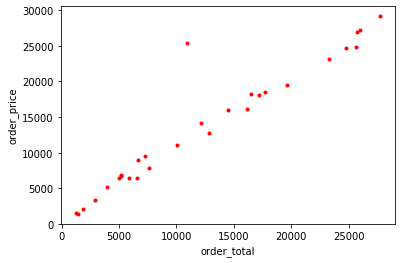

In [50]:
# plot of old order_total v/s newly imputed order_price

plt.xlabel('order_total')
plt.ylabel('order_price')
plt.plot(list(df_corr_cart_incorr_order_price['order_total']),lst_imputed_prices,'.r')

The order_price and order_total has a straight line which means the imputation is correct for order_price.

### Reverse calculate the order_price

### Shopping cart items WRONG - order_price correct

As we can reverse calculate the **order_price** from order_total and delivery_charges, we can be certain that the order_price is correct, and the items are wrong in the shopping cart.

In [51]:
df_rel_holds = df_incorrect_order_price[df_incorrect_order_price['order_price'] == ((df_incorrect_order_price['order_total'] - df_incorrect_order_price['delivery_charges'])/(100-df_incorrect_order_price['coupon_discount']))*100]

Out of the 53 orders, **24 orders** have the correct order_price.

This means that the **shoppping cart items are wrong** for these orders

### Function to find the correct cart item for these 24 orders

As we know the correct order_price for the order, we can us this as a condition to identify the incorrect item of the cart.

The find the correct item of the order, I substitute each of the item of the shopping cart with the 10 items the store sells.

The item for which the true order_price matches the calculated order_price after substitution, is the correct item for that order.

In [52]:
# traverse each of the rows
for index, row in df_rel_holds.iterrows():
    
    # flag
    correct_item_found = False
    
    # substitute each of the 10 items in shopping cart
    for item,price in final_item_prices.items():
        
        # get the items of this order
        items = get_item_names(row['shopping_cart'])
        
        # get the qty of this order
        qty = get_item_qty(row['shopping_cart'])
        
        # flag for items in the cart 
        i = 0
        
        # do the check for each of the items of the cart
        while i < len(items):
            
            # get the items again as the items have been modified
            items = get_item_names(row['shopping_cart'])
            
            # substitute each of the item of the cart
            items[i] = item
            
            # zip the item and qty to form a tuple
            items_tuple = zip(items,qty)
            
            # intialize
            check_order_price = 0
            
            # calculating the total order_price
            for order in items_tuple:
                
                order = tuple(order)
                
                # value of calculated order_price after substitution
                check_order_price = check_order_price + final_item_prices[order[0]] * float(order[1]) 
            
            # check with the true order_price
            if check_order_price == row['order_price']:
                
                correct_item_found = True
                
                # get out of this loop - we found the correct item name
                break
            i = i + 1
            
        if correct_item_found:
            qty = map(int,qty)
            
            # modified shopping cart
            new_cart = list(zip(items,qty))
            print(str(new_cart))
            
            # replace with the modified cart
            df1.loc[index,'shopping_cart'] = str(new_cart)
            break

[('Alcon 10', 2), ('iStream', 2), ('pearTV', 2)]
[('Thunder line', 2), ('Alcon 10', 1), ('iAssist Line', 1), ('Lucent 330S', 1)]
[('Lucent 330S', 2), ('iStream', 2), ('iAssist Line', 1)]
[('Thunder line', 1), ('Universe Note', 2), ('Alcon 10', 2), ('iAssist Line', 2)]
[('Lucent 330S', 1), ('Toshika 750', 1)]
[('Universe Note', 1), ('Toshika 750', 1)]
[('Universe Note', 2), ('Alcon 10', 1), ('iAssist Line', 2)]
[('Thunder line', 1), ('Toshika 750', 2)]
[('Universe Note', 1), ('Candle Inferno', 1), ('pearTV', 1), ('iStream', 1)]
[('pearTV', 2), ('Thunder line', 2), ('Toshika 750', 1)]
[('Toshika 750', 1), ('pearTV', 1), ('Universe Note', 2), ('Candle Inferno', 2)]
[('Toshika 750', 1), ('Olivia x460', 2), ('Thunder line', 2), ('Alcon 10', 1)]
[('Alcon 10', 2), ('iAssist Line', 1)]
[('Candle Inferno', 2), ('iAssist Line', 1)]
[('Alcon 10', 1), ('iAssist Line', 2), ('Universe Note', 2)]
[('iAssist Line', 2), ('Universe Note', 1)]
[('Universe Note', 1), ('Candle Inferno', 2), ('Toshika 750',

### Check the Shopping cart after replacing the incorrect cart item

In [53]:
df1['check_order_price'] = df1['shopping_cart'].apply(lambda x : get_order_price(x) )

As we get no rows for the below query, the shopping cart has been fixed

In [54]:
df1[df1['check_order_price'] != df1['order_price']]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,shopping_items,shopping_item_qty,check_order_price


### Check the order_total column

As we already know the **order_price**, **delivery_charges** and the **coupon_discount**; we can calculate the order_total using the below equation:

order_total =  (order_price*(1 - discount/100)) + delivery_price

Storing the correct **order_total** value in a new column

In [55]:
df1['check_order_total'] = df1['order_price']*( 1 - df1['coupon_discount'] / 100 )  + df1['delivery_charges']

### Rows with WRONG value of order_total

In [56]:
df_incorrect_order_total = df1[ df1['check_order_total'] != df1['order_total'] ]
df_incorrect_order_total.shape

(32, 20)

There are 32 orders that have incorrect value of order_total

### Impute the order_total

Replace the order_total with the correct values

In [57]:
for x in df_incorrect_order_total.index:
    df1.loc[x,'order_total'] = df_incorrect_order_total.loc[x,'check_order_total']

### Check after impute **order_total**

In [58]:
df1[ df1['check_order_total'] != df1['order_total'] ]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,shopping_items,shopping_item_qty,check_order_price,check_order_total


As we get no result for the above query, we can be sure that the order_total column is fixed

## Check for Latitude and Longitude

Looking at the below scatter plot of Latitude and Longitude, we can see that the values are mirror image of each other. This suggests that the values of Latitude and Longitude have been interchaged by mistake.

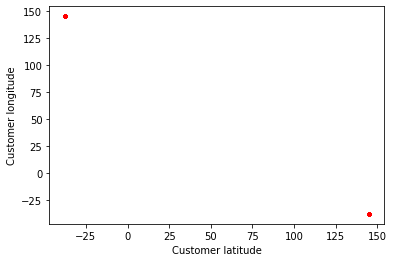

In [59]:
plt.xlabel('Customer latitude')
plt.ylabel('Customer longitude')
plt.plot(df1.customer_lat,  df1.customer_long, '.r')

In [60]:
df1.customer_lat.describe()

count    500.000000
mean     -27.942141
std       41.352126
min      -37.840654
25%      -37.817920
50%      -37.811857
75%      -37.804250
max      144.997298
Name: customer_lat, dtype: float64

### Looks like the Latitude and Langitude have been swapped by mistake

In [61]:
df_incorrect_lat_long = df1[df1.customer_lat > -37 ]

### Swap the Latitude and Longitude

Correcting the Latitude and Longitude columns.

In [62]:
df_incorrect_lat_long.rename(columns = {'customer_lat': 'customer_long', 'customer_long' : 'customer_lat'}, inplace = True)

# change the original dataframe
for x in df_incorrect_lat_long.index:
    df1.loc[x] = df_incorrect_lat_long.loc[x]

C:\Users\prash\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


### Check after replace

In [63]:
df1[df1.customer_lat > -37 ]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,shopping_items,shopping_item_qty,check_order_price,check_order_total


## Check the is_happy_customer column

Using the SentimentIntensityAnalyzer class from nltk to do the sentiment analysis of the customer review

In [64]:
senti = SentimentIntensityAnalyzer()

### Generate a column for latest_customer_review

If the compound polarity score is more than 0.05 we say that the customer was happy with the purchase

In [65]:
def check_latest_customer_review(sentence):
    '''
    Function to check the sentiment of customer based on the product review
    '''
    
    if senti.polarity_scores(sentence)['compound'] >= 0.05:
        return True
    else:
        return False

In [66]:
df1['check_is_customer_happy'] = df1['latest_customer_review'].apply(check_latest_customer_review)

We perform a **XOR** operation to check if the **is_happy_customer** has correct value

**XOR** give the rows where the calculated customer sentiment is different from the given customer sentiment 

These rows have inncorrect value for **is_happy_customer**

In [67]:
df_incorrect_is_happy_customer = df1[df1.is_happy_customer ^ df1.check_is_customer_happy]

In [68]:
df_incorrect_is_happy_customer.shape

(28, 21)

28 orders that have incorrect value for **is_happy_customer**

In [69]:
df_incorrect_is_happy_customer['is_happy_customer'] = df_incorrect_is_happy_customer['check_is_customer_happy']

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Impute **is_happy_customer**

Changing the value for these incorrect orders

In [70]:
for x in df_incorrect_is_happy_customer.index:
    df1.loc[x] = df_incorrect_is_happy_customer.loc[x]

### Check is_happy_customer after imputation 

In [71]:
df1[df1.is_happy_customer ^ df1.check_is_customer_happy]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,shopping_items,shopping_item_qty,check_order_price,check_order_total,check_is_customer_happy


As we get no result for the above query, we can be sure that the imputation for is_happy_customer is correct

## Lets find the nearest_warehouse

Using the Havershine formula we can calculate the distance between two location provided we have the latitude and longitude of the 2 locations and the Radius of Earth.

In [72]:
'''
Calculate distance using the Haversine Formula.

Reference:
https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula
'''

def haversine(coord1: object, coord2: object):

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2

    R = 6378000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)
    km = round(km, 4)

    return km

Making a new Dataframe of Latitude and Longitude.

In [73]:
# prepare the data in Lat,Long form
cust_lat_long = df1[['customer_lat', 'customer_long']].apply(lambda x: ','.join(x.astype(str)), axis = 1)

# store the prepared data in a new dataframe 
df_cust_lat_long = pd.DataFrame(index = range(len(cust_lat_long)), data = cust_lat_long, columns = ['lat_long'])

Store the Location of each Warehouse in Dictionary, with key as the warehouse name and value as the co-ordinates.

In [74]:
dict_warehouses = {'Nickolson': (-37.818595,144.969551),
                   'Thompson' : (-37.8126732,144.9470689),
                    'Bakers' : (-37.8099961,144.995232)}

### Distances from all 3 warehouese

Here we calculate the Distance of the Customer from all the 3 warehouse.

In [75]:
def cal_warehouses_dist(lat_long):
    '''
    Function to calculate the distance of the customer from all the 3 warehouses.
    Return : A dictionary for value of distance of customer from each of the 3 warehouses
    '''
    
    # customer location
    lat_long = str(lat_long)
    re_results = re.findall(r'(-?\d+\.-?\d+)',lat_long)
    
    cust_lat = float(re_results[0])
    cust_long = float(re_results[1])
    
    dict_distance_from_warehouses = {}
    
    # calculate the distance from each of the 3 warehouses
    for warehouse,location in dict_warehouses.items():
        
        # haversine() function needs 2 list containing Lat, Long   
        distance_from_warehouse = haversine([location[0],location[1]], [cust_lat,cust_long])
        
        # store results in a dict
        dict_distance_from_warehouses[warehouse] = distance_from_warehouse
        
    return dict_distance_from_warehouses

### Nearest warehouse data

As we already calculated the distance of the customer from all the 3 warehouses, we can get the name and distance of the warehouse that is nearest to the customer.

In [76]:
def get_nearest_warehouse(dict_distance_from_warehouses):
    '''
    Using the result from cal_warehouses_dist() fucntion, return dictionary having the warehouse closest to the customer
    '''
    
    # get the min distance
    min_dist = min(dict_distance_from_warehouses.values())
    
    # get the name of warehouse corresponding to min distance
    nearest_warehouse = [ warehouse for warehouse, distance in dict_distance_from_warehouses.items() if distance == min_dist ]
    
    dict_nearest_warehouse = {}
    
    # dict of nearest warehouse name and distance
    dict_nearest_warehouse[nearest_warehouse[0]] = min_dist
    
    return dict_nearest_warehouse

### Nearest warehouse name

Getting the name of nearest warehouse.

In [77]:
def get_nearest_warehouse_name(dict_nearest_warehouse):
    '''
    Using the result from get_nearest_warehouse() fucntion, return the name of warehouse closest to the customer
    '''
    return list(dict_nearest_warehouse.keys())[0]

### Nearest warehoues distance

Getting the distance of the nearest warehouse.

In [78]:
def get_nearest_warehouse_dist(dict_nearest_warehouse):
    '''
    Using the result from get_nearest_warehouse() fucntion, return the distance of warehouse closest to the customer
    '''
    return list(dict_nearest_warehouse.values())[0]

### Storing the calculated nearest_warehouse and nearest_warehouse_dist in new column.

Applying the defined function for getting the nearest warehouse on our dataframe.

In [79]:
df1['check_nearest_warehouse'] = df_cust_lat_long['lat_long'].apply(lambda x : get_nearest_warehouse_name(get_nearest_warehouse(cal_warehouses_dist(x))))

In [80]:
df1['check_nearest_warehouse']

0         Bakers
1         Bakers
2      Nickolson
3         Bakers
4       Thompson
         ...    
495       Bakers
496     Thompson
497     Thompson
498     Thompson
499     Thompson
Name: check_nearest_warehouse, Length: 500, dtype: object

Applying the defined function for getting the nearest warehouse distance on our dataframe.

In [82]:
df1['check_nearest_warehouse_dist'] = round(df_cust_lat_long['lat_long'].apply(lambda x : get_nearest_warehouse_dist(get_nearest_warehouse(cal_warehouses_dist(x))) ),4)

In [84]:
df1['check_nearest_warehouse_dist'] = df_cust_lat_long['lat_long'].apply(lambda x : get_nearest_warehouse_dist(get_nearest_warehouse(cal_warehouses_dist(x))) )

In [85]:
df1['check_nearest_warehouse_dist']

0      0.9679
1      2.3701
2      0.3879
3      1.2618
4      0.3024
        ...  
495    1.1353
496    1.3218
497    1.3003
498    1.5701
499    1.5765
Name: check_nearest_warehouse_dist, Length: 500, dtype: float64

In [83]:
df1['check_nearest_warehouse_dist']

0      0.9679
1      2.3701
2      0.3879
3      1.2618
4      0.3024
        ...  
495    1.1353
496    1.3218
497    1.3003
498    1.5701
499    1.5765
Name: check_nearest_warehouse_dist, Length: 500, dtype: float64

Below 55 orders have incorrect value of **nearest_warehouse**.
The variation in the distance of the nearest warehouse is due to the rounding of the distance.
As the variation is very minor of a single decimal place, we can ignore this and impute the **nearest_warehouse** column.

In [79]:
df1[df1['nearest_warehouse'] != df1['check_nearest_warehouse']].loc[:,['nearest_warehouse','distance_to_nearest_warehouse','check_nearest_warehouse','check_nearest_warehouse_dist']].shape

(55, 4)

### Impute nearest_warehouse

Imputing the above identified 55 order having incorrect value of nearest_warehouse.

In [80]:
df_incorrect_nearest_warehouse = df1[df1['nearest_warehouse'] != df1['check_nearest_warehouse']]

In [81]:
for x in df_incorrect_nearest_warehouse.index:
    df1.loc[x,'nearest_warehouse'] = df1.loc[x,'check_nearest_warehouse']

### Check after replace

As we have imuted the nearest warehouse value, we don not get any result for the below query.

In [82]:
df1[df1['nearest_warehouse'] != df1['check_nearest_warehouse']]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,shopping_items,shopping_item_qty,check_order_price,check_order_total,check_is_customer_happy,check_nearest_warehouse,check_nearest_warehouse_dist


## Check the value of distance_to_nearest_warehouse

We calculate the absolute difference between the distance given in the dataseta and the calculated distance to the nearest warehouse.

We can ignore the minor variation arising due to rounding of the distances

Following are the orders for which the values of **distance_to_nearest_warehouse** is incorrect

In [83]:
df1[abs((round(df1['distance_to_nearest_warehouse'],3) - round(df1['check_nearest_warehouse_dist'],3) )) > 0.2 ].shape

(180, 23)

### Replacing the distance_to_nearest_warehouse with correct values

Replacing the distance for orders having incorrect value of distance_to_nearest_warehouse. 

In [84]:
df_incorrect_dist_nearest_warehouse = df1[abs((round(df1['distance_to_nearest_warehouse'],3) - round(df1['check_nearest_warehouse_dist'],3) )) > 0.2 ]

In [85]:
for x in df_incorrect_dist_nearest_warehouse.index:
    df1.loc[x,'distance_to_nearest_warehouse'] = df_incorrect_dist_nearest_warehouse.loc[x,'check_nearest_warehouse_dist']

Check the values after imputation

In [86]:
df1[abs((round(df1['distance_to_nearest_warehouse'],3) - round(df1['check_nearest_warehouse_dist'],3) )) > 0.2 ].loc[:,['nearest_warehouse','distance_to_nearest_warehouse','check_nearest_warehouse','check_nearest_warehouse_dist']]

,nearest_warehouse,distance_to_nearest_warehouse,check_nearest_warehouse,check_nearest_warehouse_dist


## Check the season column

As we know the months for which each of the season happens, we can do as simple mapping and check the season column.

As the date has already been fixed we can be sure that the season is incorrect for the orders failing this check.

In [87]:
def get_season(order_date):
    '''
    Function to check if the date is mapped to the correct season of the year.
    '''
    
    if int(order_date.split('-')[1]) in [12,1,2]:
        return 'Summer'
    elif int(order_date.split('-')[1]) in [3,4,5]:
        return 'Autumn'
    elif int(order_date.split('-')[1]) in [6,7,8]:
        return 'Winter'
    elif int(order_date.split('-')[1]) in [9,10,11]:
        return 'Spring'

In [88]:
df1['check_season'] = df1['date'].apply(get_season)

Following rows have incorrect value of season

In [89]:
df1[df1['season'] != df1['check_season']].shape

(24, 24)

### Impute the season

In [90]:
df_incorrect_season = df1[df1['season'] != df1['check_season']]

In [91]:
# change the original dataframe
for x in df_incorrect_season.index:
    df1.loc[x,'season'] = df_incorrect_season.loc[x,'check_season']

### Check after impute

In [92]:
df1[df1['season'] != df1['check_season']]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,latest_customer_review,is_happy_customer,shopping_items,shopping_item_qty,check_order_price,check_order_total,check_is_customer_happy,check_nearest_warehouse,check_nearest_warehouse_dist,check_season


## Checking the values of is_expedited_delivery

By visualizing Boxplot of Delivery charges when is_customer is True/False, can tell us whether the value of delivery charges is an outlier or not.

As we have already fixed the is_happy_customer, the only value to impute here is the is_expedite_delivery.

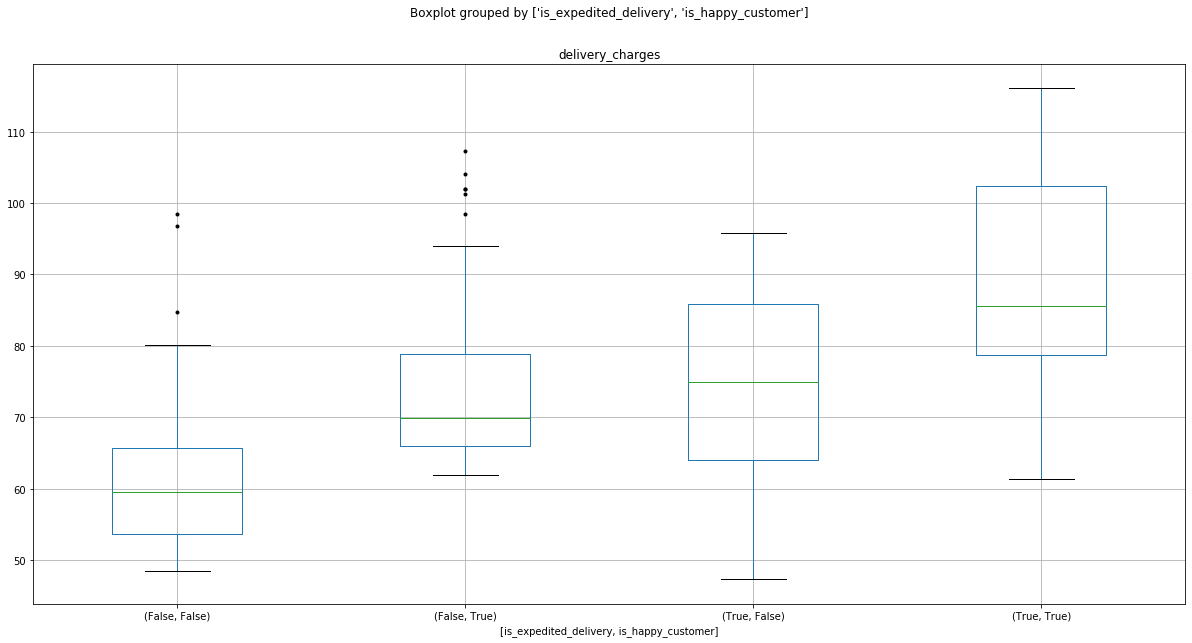

In [93]:
df1.boxplot('delivery_charges',by=['is_expedited_delivery','is_happy_customer'],sym='k.', figsize=(20, 10))

Above Boxplot shows that the is_expedite_delivery is incorrect for 8 orders.

When is_expedited_delivery is False and is_happy_customer is True

In [94]:
df_f_t = df1[(df1['is_expedited_delivery'] == False) & (df1['is_happy_customer'] == True)]

q1 = np.quantile(df1[ (df1['is_expedited_delivery'] == False) & (df1['is_happy_customer'] == True) ]['delivery_charges'], .25)
q3 = np.quantile(df1[ (df1['is_expedited_delivery'] == False) & (df1['is_happy_customer'] == True) ]['delivery_charges'], .75)

iqr = q3 - q1

list_index_to_impute = list(df_f_t[df_f_t['delivery_charges'] > (q3 + 1.5* iqr)].index)

When is_expedited_delivery is False and is_happy_customer is False

In [95]:
df_f_f = df1[(df1['is_expedited_delivery'] == False) & (df1['is_happy_customer'] == False)]

q1 = np.quantile(df1[ (df1['is_expedited_delivery'] == False) & (df1['is_happy_customer'] == False) ]['delivery_charges'], .25)
q3 = np.quantile(df1[ (df1['is_expedited_delivery'] == False) & (df1['is_happy_customer'] == False) ]['delivery_charges'], .75)

iqr = q3 - q1

list_index_to_impute.append(list(df_f_f[df_f_f['delivery_charges'] > (q3 + 1.5* iqr)].index))

Making a single list of index to impute

In [96]:
lst_indexes = []

for x in list_index_to_impute:
    
    if type(x) != list:
        lst_indexes.append(x)
    elif type(x)== list:
        for y in x:
            lst_indexes.append(y)           

### Impute is_expedite_delivery

We have the indexes of the order to impute the is_expedite_delivery. Using these indexes to change the original dataframe.

In [97]:
lst_indexes

[88, 202, 373, 383, 415, 416, 48, 109, 317]

In [98]:
# changing the values in the original datafarme
for index in lst_indexes:
    df1.loc[index,'is_expedited_delivery'] = True

### Checking the Boxplot after impute

We can see that we no longer have outliers for the is_expedited_delivery.

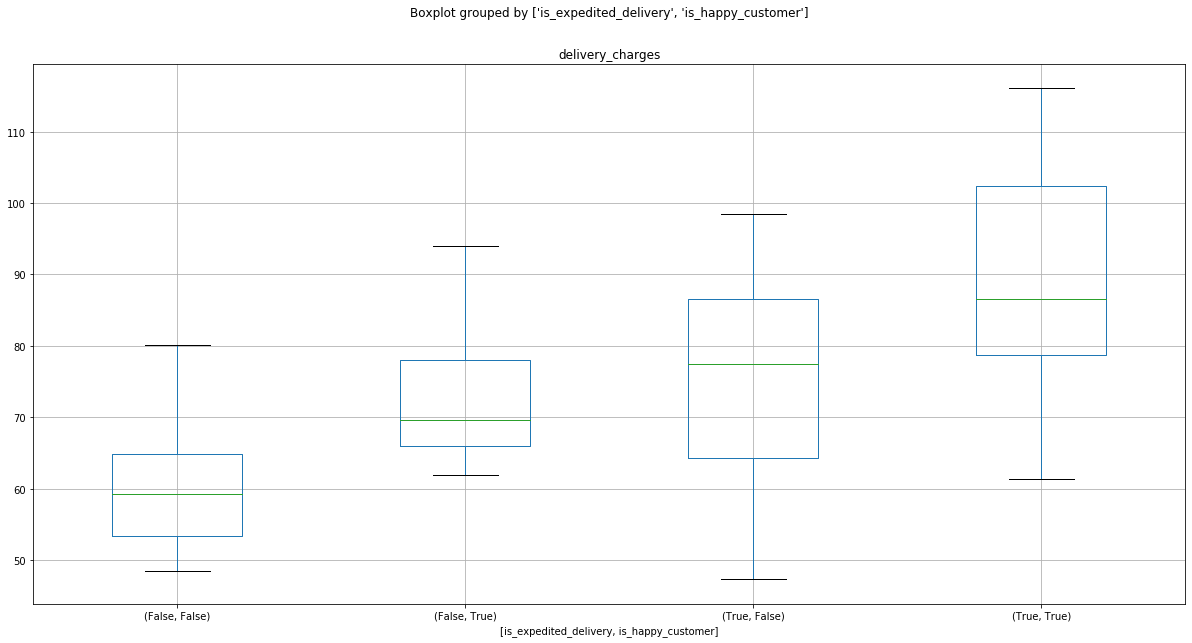

In [99]:
df1.boxplot('delivery_charges',by=['is_expedited_delivery','is_happy_customer'],sym='k.', figsize=(20, 10))

### Export the CSV for Task 1 - Dirty data

Before we export the data, we get rid of the unnecessary columns added for analysis.

In [100]:
columns_to_drop = ['shopping_items','shopping_item_qty','check_order_price','check_order_total','check_is_customer_happy','check_nearest_warehouse','check_nearest_warehouse_dist','check_season']
df1.drop(columns_to_drop, 1, inplace=True)

In [101]:
df1.to_csv('31187366_dirty_data_solution.csv', index=False)

# TASK 2 - MISSING DATA

Reading the data file.

In [102]:
#load the data 
df2 = pd.read_csv('31187366_missing_data.csv') 

Using the `describe` function to view some basic statistical details like percentile, mean, std etc. of the read CSV file.

In [103]:
df2.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse,is_happy_customer
count,485.000000,460.000000,500.000000,500.000000,500.000000,485.000000,469.000000,460.000000
mean,13376.072165,76.827674,-37.812394,144.967145,10.570000,12069.082928,1.093301,0.778261
std,7800.560618,13.743468,0.007579,0.021975,8.507046,7126.747772,0.508849,0.415869
min,580.000000,46.690000,-37.827411,144.902237,0.000000,547.720000,0.102500,0.000000
25%,6905.000000,66.297500,-37.818784,144.951516,5.000000,6266.060000,0.722500,1.000000
50%,12335.000000,77.120000,-37.812345,144.963973,10.000000,11178.190000,1.082000,1.000000
75%,19430.000000,83.165000,-37.806532,144.983031,15.000000,17147.290000,1.435500,1.000000
max,37300.000000,111.210000,-37.796817,145.015963,25.000000,35501.290000,3.963700,1.000000


As `decribe()` by default shows stastics for only numerical data. 

To see the statistics of Categorical data we use `include` parameter of `describe` to include Datatype of type Object i.e. categorical data.

In [104]:
df2.describe(include=['O'])

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,445,500,500,500
unique,500,492,284,3,452,4,500
top,ORD327211,ID0387153060,2019-02-20,Thompson,"[('Olivia x460', 2), ('iStream', 1)]",Autumn,five stars awesome phone. would recommend it h...
freq,1,2,6,187,4,138,1


## Missing is_happy_customer

Below 40 orders have missing value of `is_happy_customer`

In [105]:
df2_missing_is_happy_customer = df2[df2['is_happy_customer'].isna()]
df2_missing_is_happy_customer.shape

(40, 16)

### Fill the missing is_happy_customer

We make use of `SentimentIntensityAnalyzer` to decide the sentiment of the customer based on the customer review and fill  the value of is_happy_customer column.

In [106]:
senti = SentimentIntensityAnalyzer()

In [107]:
def fill_is_happy_customer(review):
    '''
    Function to check the sentiment of customer using the customer review.
    '''
    
    if senti.polarity_scores(review)['compound'] >= 0.05:
        return 1.0
    else:
        return 0.0

In [108]:
df2_missing_is_happy_customer['is_happy_customer'] = df2_missing_is_happy_customer['latest_customer_review'].apply(fill_is_happy_customer)

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Check after filling the missing data

In [109]:
df2_missing_is_happy_customer[df2_missing_is_happy_customer['is_happy_customer'].isna()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer


### Fill the original Dataframe

Making the changes in the original dataframe.

In [110]:
for x in df2_missing_is_happy_customer.index:
    df2.loc[x,'is_happy_customer'] = df2_missing_is_happy_customer.loc[x,'is_happy_customer']

We dont get any result for below query, as we have filled the is_happy_customer column.

In [111]:
df2[df2['is_happy_customer'].isna()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer


## Checking Distance and Warehouse

### Both distance and warehouse missing

Below 31 orders have missing value for `nearest_warehouse` and `distance_to_nearest_warehouse` column.

In [112]:
df2[df2['nearest_warehouse'].isna() & df2['distance_to_nearest_warehouse'].isna() ].shape

(31, 16)

### Warehouse name missing

Below 55 orders have missing value of `nearest_warehouse` column.

In [113]:
df2[df2['nearest_warehouse'].isna() ].shape

(55, 16)

### Distance missing

Below 31 orders have missing value of `distance_to_nearest_warehouse` column.

In [114]:
df2[df2['distance_to_nearest_warehouse'].isna()].shape

(31, 16)

### Find the Distance and Warehouse

### Lets find the nearest_warehouse

Make a new Dataframe of missing warehouses.

In [115]:
df2_missing_warehouse = df2[df2['nearest_warehouse'].isna()]

Prepare data to calcuate the distance and the nearest warehouse.

In [116]:
cust_lat_long = df2_missing_warehouse['customer_lat'].astype(str) + ',' + df2_missing_warehouse['customer_long'].astype(str)
df_cust_lat_long = pd.DataFrame(index = range(len(cust_lat_long)), data = list(cust_lat_long), columns = ['lat_long'])

Applying the functions on the Dataframe.

In [117]:
nearest_warehouse = df_cust_lat_long['lat_long'].apply(lambda x : get_nearest_warehouse_name(get_nearest_warehouse(cal_warehouses_dist(x))))
nearst_warehouse_dist = round(df_cust_lat_long['lat_long'].apply(lambda x : get_nearest_warehouse_dist(get_nearest_warehouse(cal_warehouses_dist(x))) ),4)

In [118]:
filling_missing_warehouses = tuple(zip(nearest_warehouse,nearst_warehouse_dist))

### Replace the missing warehouse

Imputing the original dataframe

In [119]:
i = 0

lst_missing_warehouses_index = list(df2_missing_warehouse.index)

for x in filling_missing_warehouses:
    
    df2.loc[lst_missing_warehouses_index[i],'nearest_warehouse'] = str(x[0])
    df2.loc[lst_missing_warehouses_index[i],'distance_to_nearest_warehouse'] = round(x[1],4)
    
    i += 1

As we have imputed the distance and warehouse name, we get no result for below queries.

In [120]:
df2[df2['distance_to_nearest_warehouse'].isna()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer


In [121]:
df2[df2['nearest_warehouse'].isna()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer


## Fill the order_price

Seperating the item name and quantity using the predefined functions, namely `get_item_names` and `get_item_qty`.

In [122]:
df2['shopping_items'] = df2['shopping_cart'].apply(get_item_names)
df2['shopping_item_quantity'] = df2['shopping_cart'].apply(get_item_qty)

Make a new dataframe of missing order_price

In [123]:
df2_missing_order_price = df2[df2['order_price'].isna()]

Using the predefined `get_order_price` to calculate the order_price.

In [124]:
df2_missing_order_price['order_price'] = df2_missing_order_price['shopping_cart'].apply(lambda x : get_order_price(x) )

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Impute order_price

Imputing the order_price in the original dataframe.

In [125]:
for x in df2_missing_order_price.index:
    df2.loc[x,'order_price'] = df2_missing_order_price.loc[x,'order_price']     

### Check after replace

As we have imputed the value of order_price, we get no result for below query.

In [126]:
df2[df2['order_price'].isna()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,shopping_items,shopping_item_quantity


## Check order_total

Make a new dataframe for dataframe of missing order_total

In [127]:
df2_missing_order_total = df2[df2['order_total'].isna()]

As we know the discount, delivery_charges and the order_price; we can calculate the order_total.

In [128]:
def get_order_total(df):
    '''
    Function to calculate the order_total
    '''
    
    order_price = df['order_price']
    discount = df['coupon_discount']
    delivery_charges = df['delivery_charges']
    
    return order_price*( 1 - (discount/100)) + delivery_charges

In [129]:
df2_missing_order_total['order_total'] = df2_missing_order_total.apply(get_order_total,axis=1)

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Fill missing order_total

Imputing the original dataframe.

In [130]:
for x in df2_missing_order_total.index:
    df2.loc[x,'order_total'] = df2_missing_order_total.loc[x,'order_total']     

### Check after replace

As we have imputed the order_total, we get no data for below query

In [131]:
df2[df2['order_total'].isna()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,shopping_items,shopping_item_quantity


## Delivery charges

### METHOD 1. USING LINEAR REGRESSION MODEL

### Making Regression model for each of the three seasons

As the data given in Missing Data file is correct, so we can use this data to build Linear Regression model.

### 1. Regression model for Spring

In [132]:
df_spring = df2[df2['season'] == 'Spring'].dropna(how="any")

Preparing the input and output data to train the Linear regression model

In [133]:
lst_tuple = list(zip(df_spring['distance_to_nearest_warehouse'], df_spring['is_expedited_delivery'],df_spring['is_happy_customer']))
lst_input = [ list(x) for x in lst_tuple ]
lst_output = list(df_spring['delivery_charges'].astype(int))

Fitting a model for delivery charges for Spring

In [134]:
model_spring = LinearRegression().fit(lst_input, lst_output)

Preparing data of Spring to predict the delivery charges

In [135]:
df2_spring = df2[(df2['distance_to_nearest_warehouse'].notnull()) & (df2['season'] == 'Spring') & (df2['is_expedited_delivery'].notnull()) & (df2['is_happy_customer'].notnull())]

lst_tuple_input_to_check = list(zip(df2_spring['distance_to_nearest_warehouse'], df2_spring['is_expedited_delivery'], df2_spring['is_happy_customer']))
lst_input_to_check = [ list(x) for x in lst_tuple_input_to_check ]

Predicted Delivery charges using Regression model for Spring

In [136]:
delivery_charges_using_model_spring = model_spring.predict(lst_input_to_check)

### Compare given Delivery charges with predicted Delivery charges for Spring

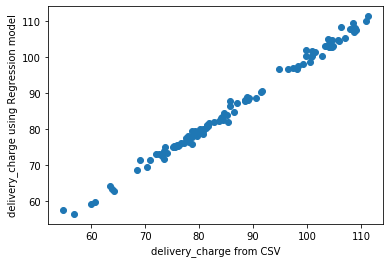

In [137]:
plt.xlabel('delivery_charge from CSV')
plt.ylabel('delivery_charge using Regression model')
plt.scatter(df2_spring['delivery_charges'], delivery_charges_using_model_spring)

### 2. Regression model for Autumn

In [138]:
df_autumn = df2[df2['season'] == 'Autumn'].dropna(how="any")

Preparing the input and output data to train the Linear regression model for Autumn

In [139]:
lst_tuple = list(zip(df_autumn['distance_to_nearest_warehouse'], df_autumn['is_expedited_delivery'],df_autumn['is_happy_customer']))
lst_input = [ list(x) for x in lst_tuple ]
lst_output = list(df_autumn['delivery_charges'].astype(int))

Fitting a model for delivery charges for Autumn

In [140]:
model_autumn = LinearRegression().fit(lst_input, lst_output)

Preparing data of Autumn to predict the delivery charges

In [141]:
df2_autumn = df2[(df2['distance_to_nearest_warehouse'].notnull()) & (df2['season'] == 'Autumn') & (df2['is_expedited_delivery'].notnull()) & (df2['is_happy_customer'].notnull())]

lst_tuple_input_to_check = list(zip(df2_autumn['distance_to_nearest_warehouse'], df2_autumn['is_expedited_delivery'], df2_autumn['is_happy_customer']))
lst_input_to_check = [ list(x) for x in lst_tuple_input_to_check ]

Predicted Delivery charges using Regression model for Autumn

In [142]:
delivery_charges_using_model_autumn = model_autumn.predict(lst_input_to_check)

### Compare given Delivery charges with predicted Delivery charges for Autumn

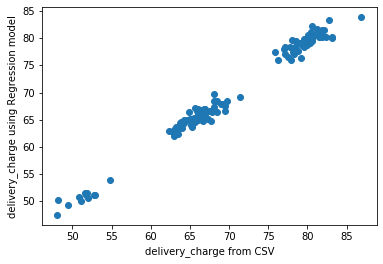

In [143]:
plt.xlabel('delivery_charge from CSV')
plt.ylabel('delivery_charge using Regression model')
plt.scatter(df2_autumn['delivery_charges'], delivery_charges_using_model_autumn)

### 3. Regression model for  Winter

In [144]:
df_winter = df2[df2['season'] == 'Winter'].dropna(how="any")

Preparing the input and output data to train the Linear regression model for Winter

In [145]:
lst_tuple = list(zip(df_winter['distance_to_nearest_warehouse'], df_winter['is_expedited_delivery'],df_winter['is_happy_customer']))
lst_input = [ list(x) for x in lst_tuple ]
lst_output = list(df_winter['delivery_charges'].astype(int))

Fitting a model for delivery charges for Winter

In [146]:
model_winter = LinearRegression().fit(lst_input, lst_output)

Preparing data of Winter to predict the delivery charges

In [147]:
df2_winter = df2[(df2['distance_to_nearest_warehouse'].notnull()) & (df2['season'] == 'Winter') & (df2['is_expedited_delivery'].notnull()) & (df2['is_happy_customer'].notnull())]

lst_tuple_input_to_check = list(zip(df_winter['distance_to_nearest_warehouse'], df_winter['is_expedited_delivery'], df_winter['is_happy_customer']))
lst_input_to_check = [ list(x) for x in lst_tuple_input_to_check ]

Predicted Delivery charges using Regression model for Winter

In [148]:
delivery_charges_using_model_winter = model_winter.predict(lst_input_to_check)

### Compare given Delivery charges with predicted Delivery charges for Winter

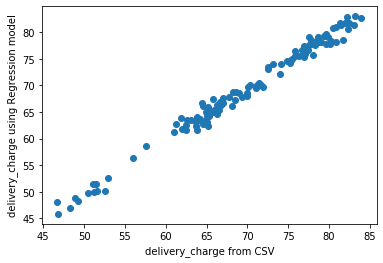

In [149]:
plt.xlabel('delivery_charge from CSV')
plt.ylabel('delivery_charge using Regression model')
plt.scatter(df_winter['delivery_charges'], delivery_charges_using_model_winter)

### 4. Regression model for Summer

In [150]:
df_summer = df2[df2['season'] == 'Summer'].dropna(how="any")

Preparing the input and output data to train the Linear regression model for Summer

In [151]:
lst_tuple = list(zip(df_summer['distance_to_nearest_warehouse'], df_summer['is_expedited_delivery'],df_summer['is_happy_customer']))
lst_input = [ list(x) for x in lst_tuple ]
lst_output = list(df_summer['delivery_charges'].astype(int))

In [152]:
model_summer = LinearRegression().fit(lst_input, lst_output)

Preparing data of Autumn to predict the delivery charges for Summer

In [153]:
df2_summer = df2[(df2['distance_to_nearest_warehouse'].notnull()) & (df2['season'] == 'Summer') & (df2['is_expedited_delivery'].notnull()) & (df2['is_happy_customer'].notnull())]

lst_tuple_input_to_check = list(zip(df2_summer['distance_to_nearest_warehouse'], df2_summer['is_expedited_delivery'], df2_summer['is_happy_customer']))
lst_input_to_check = [ list(x) for x in lst_tuple_input_to_check ]

Predicted Delivery charges using Regression model for Summer

In [154]:
delivery_charges_using_model_summer = model_summer.predict(lst_input_to_check)

### Compare given Delivery charges with predicted Delivery charges for Summer

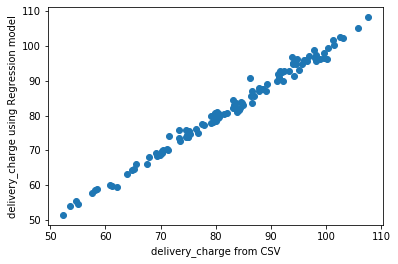

In [155]:
plt.xlabel('delivery_charge from CSV')
plt.ylabel('delivery_charge using Regression model')
plt.scatter(df2_summer['delivery_charges'], delivery_charges_using_model_summer)

### METHOD 2. Calculate Delivery charges using EQUATION

As we know that order_total is the sum of  discounted order_price and the delivery charges, we can calculate the order_total as follows:

order_total = delivery_price + ( ( 1 - discount/100) * order_price )

Rewriting the equation, we get the delivery_charges for each order.

delivery_price = order_total - ( ( 1 - discount/100) * order_price )

In [156]:
df2[df2['delivery_charges'].notnull()].shape

(460, 18)

Verify the equation - works for all the 460 rows for which we have the delivery charges given.

In [157]:
df2[ df2['delivery_charges'] == round((df2['order_total'] - ( ( 1 - df2['coupon_discount']/100) * df2['order_price'] )),2) ].shape

(460, 18)

Calculating Delivery charges for each of the seasons using the equation.

In [158]:
delivery_charges_using_eq_autumn = list(round((df2_autumn['order_total'] - ( ( 1 - df2_autumn['coupon_discount']/100) * df2_autumn['order_price'] )),2))
delivery_charges_using_eq_spring = list(round((df2_spring['order_total'] - ( ( 1 - df2_spring['coupon_discount']/100) * df2_spring['order_price'] )),2))
delivery_charges_using_eq_winter = list(round((df_winter['order_total'] - ( ( 1 - df_winter['coupon_discount']/100) * df_winter['order_price'] )),2))
delivery_charges_using_eq_summer = list(round((df2_summer['order_total'] - ( ( 1 - df2_summer['coupon_discount']/100) * df2_summer['order_price'] )),2))

### Scatter plot of Delivery charges obtained using the equation for Autumn

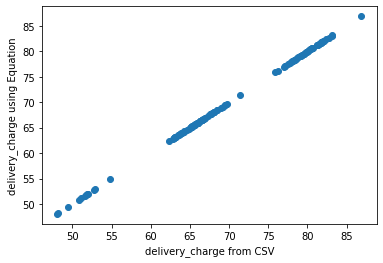

In [159]:
plt.xlabel('delivery_charge from CSV')
plt.ylabel('delivery_charge using Equation')
plt.scatter(delivery_charges_using_eq_autumn, df2_autumn['delivery_charges'])

### Scatter plot of Delivery charges obtained using the equation for Spring

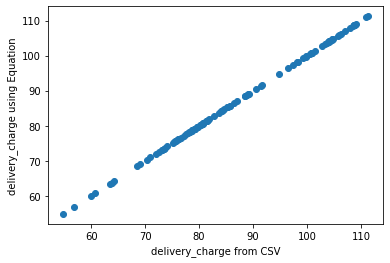

In [160]:
plt.xlabel('delivery_charge from CSV')
plt.ylabel('delivery_charge using Equation')
plt.scatter(delivery_charges_using_eq_spring, df2_spring['delivery_charges'])

### Scatter plot of Delivery charges obtained using the equation for Winter

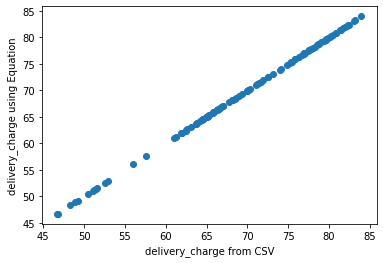

In [161]:
plt.xlabel('delivery_charge from CSV')
plt.ylabel('delivery_charge using Equation')
plt.scatter(delivery_charges_using_eq_winter, df_winter['delivery_charges'])

### Scatter plot of Delivery charges obtained using the equation for Summer

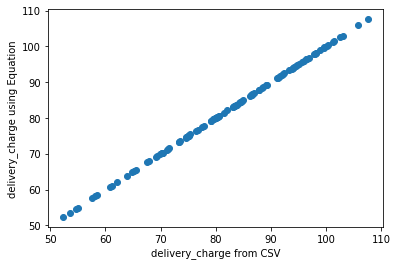

In [162]:
plt.xlabel('delivery_charge from CSV')
plt.ylabel('delivery_charge using Equation')
plt.scatter(delivery_charges_using_eq_summer, df2_summer['delivery_charges'])

### Comapring the 2 approach: Equation v/s Regression model

### Fill the delivery_charges - using equation

We can see from the above plots that the deilvery charges obtained using the equation, do not deviate much from the true delivery charges.

On the other hand, the delivery charges obtained using the Regression model, has high variance from the true delivery charges.

This means using the Equation to fill the missing Delivery charges is a good approach.

Also, the Equation is independent of the season and works in all the cases.

In [163]:
df_missing_deliver_charges = df2[( df2['delivery_charges'].isna() )]

In [164]:
df_missing_deliver_charges.shape

(40, 18)

In [165]:
def get_delivery_charge(order):
    '''
    Function to calculate the delivery charges
    '''
    
    order_total = order['order_total']
    order_price = order['order_price']
    coupon_discount = order['coupon_discount']
    
    delivery_charges = order_total - (order_price * (1 - coupon_discount/100))
    
    return round(delivery_charges,2)

Impute the original dataframe

In [166]:
for index,row in df_missing_deliver_charges.iterrows():
    df2.loc[index,'delivery_charges'] = get_delivery_charge(row)

### Check after filling the missing delivery_charges

As we have filled the missing delivery_charges, we get no result for below query.

In [167]:
df2[df2['delivery_charges'].isna()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,shopping_items,shopping_item_quantity


### Export the CSV for Task 2 - Missing data

Before we export the data, we get rid of the unnecessary columns added for analysis.

In [168]:
columns_to_drop = ['shopping_items','shopping_item_quantity']
df2.drop(columns_to_drop, 1, inplace=True)

In [169]:
df2.to_csv('31187366_missing_data_solution.csv', index=False)

# TASK 3 - OUTLIER ANALYSIS

Read the data for outlier detection

In [170]:
df3 = pd.read_csv('31187366_outlier_data.csv')

As the deliver charges follow a linear model;

We have to do seperate Box plot analysis for each season, is_happy_customer, is_expedited_delivery

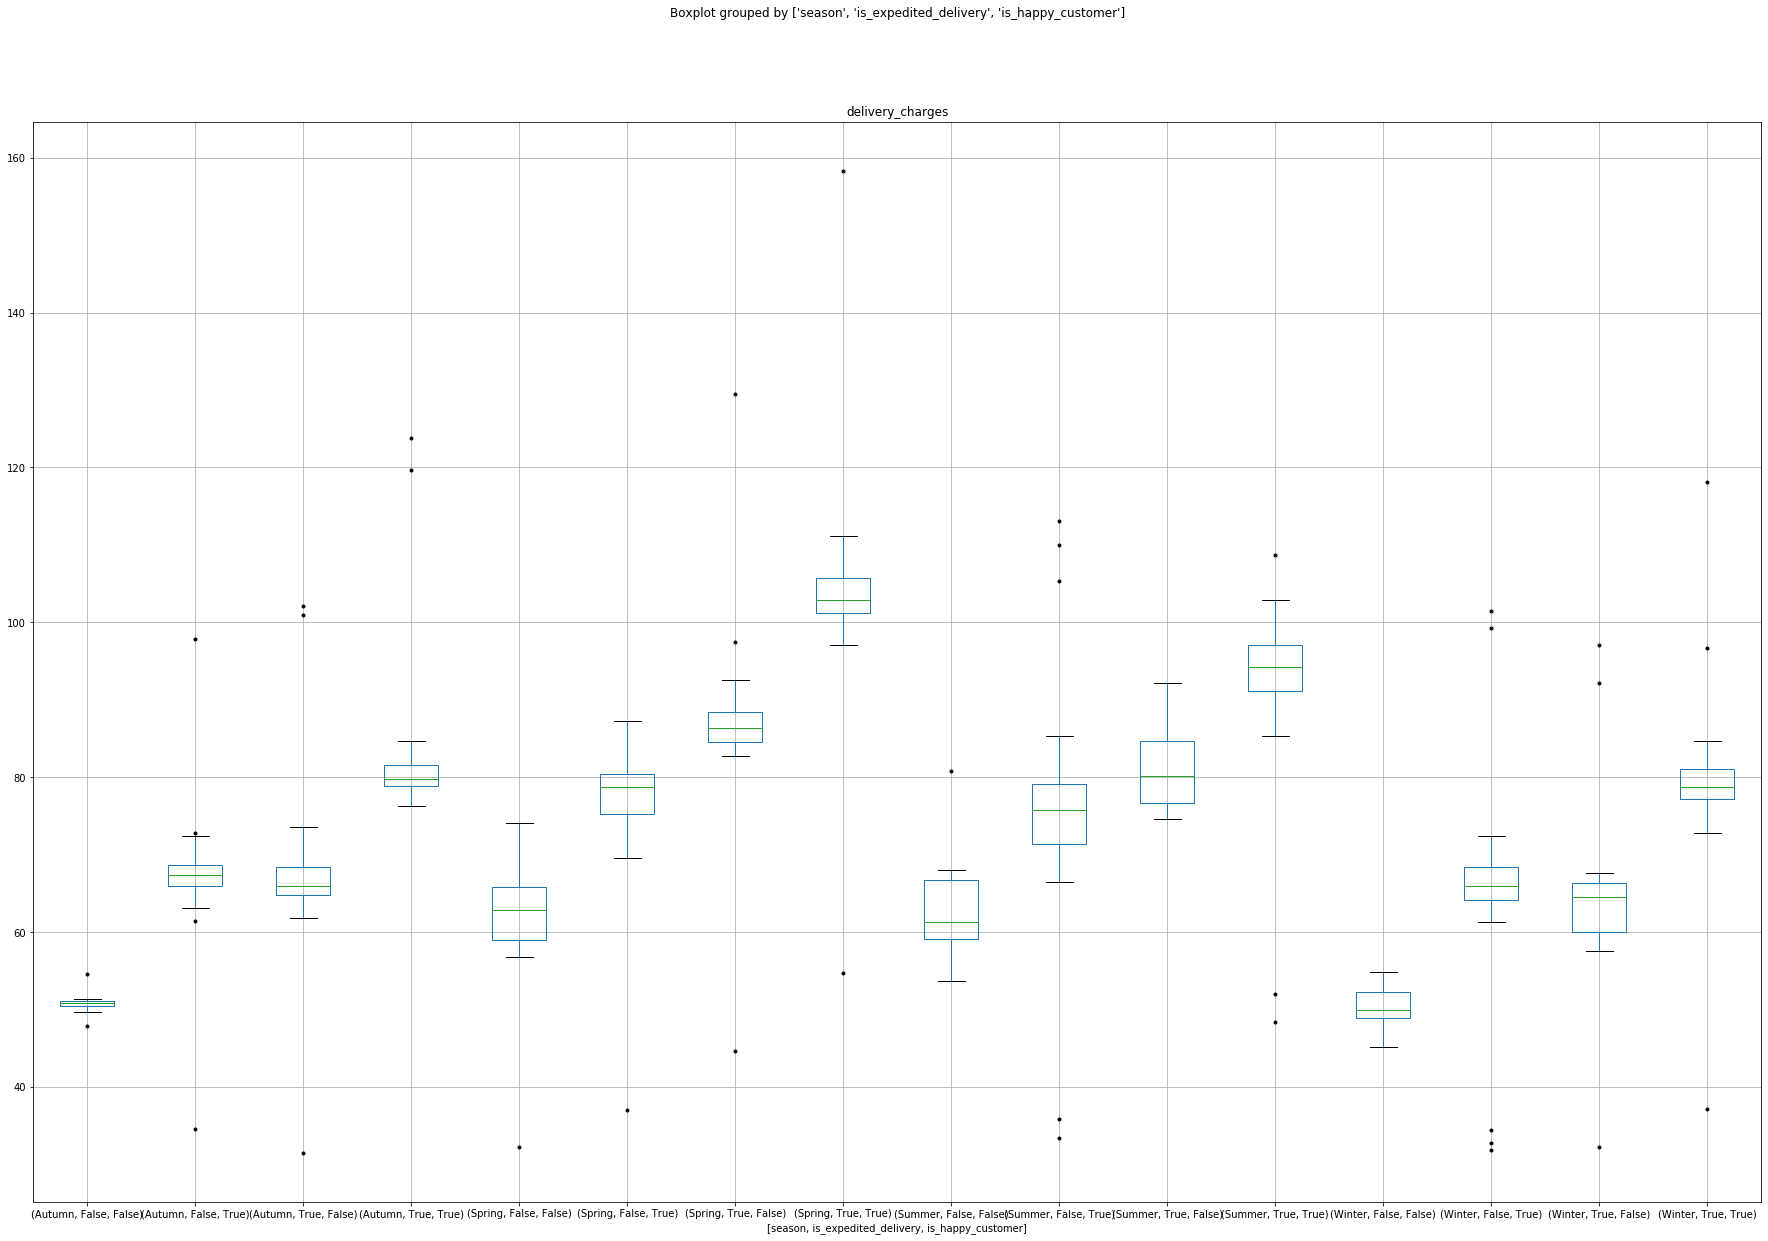

In [171]:
df3.boxplot('delivery_charges',by=['season','is_expedited_delivery','is_happy_customer'],sym='k.', figsize=(30, 20))

To see whether the delivery charges are indeed Outliers, I have compared them to the predicted delivery charges for that season using the Regression model.

If the difference between the predicted delivery charges from the regression model and the given delivery charge is greater than 4, we declare them as outliers.

In [172]:
# list to store the index of final outliers
index_outliers = []

# list to store the delivery charges of the outliers
lst_delivery_charges = []

# dictionary to store the outlier for each season
dict_predicted_delivery_charges = {}
dict_predicted_delivery_charges['Spring'] = list()
dict_predicted_delivery_charges['Autumn'] = list()
dict_predicted_delivery_charges['Winter'] = list()
dict_predicted_delivery_charges['Summer'] = list()


# repeat for each season
for season in ['Autumn', 'Summer', 'Spring', 'Winter']:
    for is_expedite in [True, False]:
        for is_happy in [True, False]:
            
            # filter the datframe before we proceed
            df_season = df3[ (df3['season'] == season) & (df3['is_expedited_delivery'] == is_expedite) & (df3['is_happy_customer'] == is_happy)]
            
            # get the first and third quartile
            q1 = np.quantile(df_season['delivery_charges'], .25)
            q3 = np.quantile(df_season['delivery_charges'], .75)
            
            # cal iqr
            iqr = q3-q1
            
            # add index to the list of outliers
            index_outliers = index_outliers +  list(df_season[df_season['delivery_charges'] > (q3 + 1.5*iqr)].index)
            index_outliers = index_outliers +  list(df_season[df_season['delivery_charges'] < (q1 - 1.5*iqr)].index)
            
            # make a dataframe of outliers
            df_outliers1 = df3.iloc[list(df_season[df_season['delivery_charges'] > (q3 + 1.5*iqr)].index)]
            df_outliers2 = df3.iloc[list(df_season[df_season['delivery_charges'] < (q1 - 1.5*iqr)].index)]
            
            # merge the 2 df
            df_outliers = pd.concat([df_outliers1, df_outliers2], ignore_index=True)
            
            # prepare the data to be used for Regression model
            lst_tuple_input_to_check = list(zip(df_outliers['distance_to_nearest_warehouse'], df_outliers['is_expedited_delivery'], df_season['is_happy_customer']))            
            lst_input_to_check = [ list(x) for x in lst_tuple_input_to_check ]
            
            # predict the delivery_charges of outliers
            if len(lst_input_to_check) != 0:
                if season == 'Summer':
                    dict_predicted_delivery_charges[season].append(model_summer.predict(lst_input_to_check))
                    predicted_charges = model_summer.predict(lst_input_to_check)
                
                elif season == 'Winter':
                    dict_predicted_delivery_charges[season].append(model_winter.predict(lst_input_to_check))
                    predicted_charges = model_winter.predict(lst_input_to_check)
                    
                elif season == 'Spring':
                    dict_predicted_delivery_charges[season].append(model_spring.predict(lst_input_to_check))
                    predicted_charges = model_spring.predict(lst_input_to_check)
                
                elif season == 'Autumn':
                    dict_predicted_delivery_charges[season].append(model_autumn.predict(lst_input_to_check))
                    predicted_charges = model_autumn.predict(lst_input_to_check)
                
                # add new column with the predicted delivery_charges
                df_outliers['predicted_delivery_charges'] = list(predicted_charges)
                
                # if the difference is greater than 4, we declare the delivery_charge as OUTLIER
                lst_delivery_charges.append(list(df_outliers[ abs(df_outliers['predicted_delivery_charges'] - df_outliers['delivery_charges']) > 4].delivery_charges))
                       

In [173]:
lst_outlier_delivery_charges = []

# making a single list of ints as the data returend was list of list
for x in lst_delivery_charges:
    for y in x:
        lst_outlier_delivery_charges.append(y)

In [174]:
dict_delivery_charges = {}
dict_delivery_charges['Spring'] = list()
dict_delivery_charges['Summer'] = []
dict_delivery_charges['Winter'] = []
dict_delivery_charges['Autumn'] = []

# gathering all the data for same season
# will be used for comparision
for season in ['Summer','Spring','Winter','Autumn']:
    for x in dict_predicted_delivery_charges[season]:
        for y in x:
            dict_delivery_charges[season].append(y)

## Visualising the Predicted delivery charges and the given Delivery charges.

In [175]:
df3_outliers = df3.iloc[index_outliers]

### Outlier for Summer

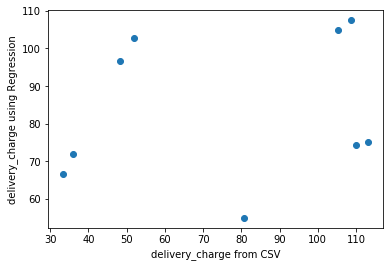

In [176]:
plt.xlabel('delivery_charge from CSV')
plt.ylabel('delivery_charge using Regression')
plt.scatter(df3_outliers[df3_outliers['season'] =='Summer']['delivery_charges'], dict_delivery_charges['Summer'])

### Outlier for Winter

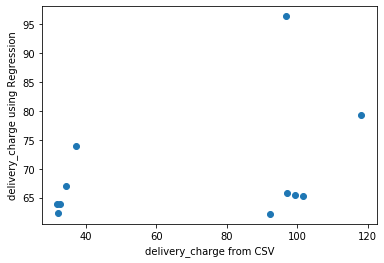

In [177]:
plt.xlabel('delivery_charge from CSV')
plt.ylabel('delivery_charge using Regression')
plt.scatter(df3_outliers[df3_outliers['season'] =='Winter']['delivery_charges'], dict_delivery_charges['Winter'])

### Outlier for Spring

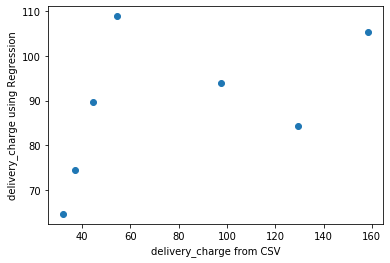

In [178]:
plt.xlabel('delivery_charge from CSV')
plt.ylabel('delivery_charge using Regression')
plt.scatter(df3_outliers[df3_outliers['season'] =='Spring']['delivery_charges'], dict_delivery_charges['Spring'])

### Outlier for Autumn

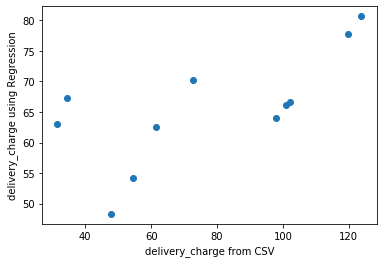

In [179]:
plt.xlabel('delivery_charge from CSV')
plt.ylabel('delivery_charge using Regression')
plt.scatter(df3_outliers[df3_outliers['season'] =='Autumn']['delivery_charges'], dict_delivery_charges['Autumn'])

## Remove the Outilers

We can see from above plots that the value of delivery_charges predicted from the Linear Regression model and the given delivery charges vary a lot.

This justifies that these delivery charges are outliers.

In [180]:
def is_outlier(delivery_charge):
    '''
    Function to check if the delievry charge belongs to a the outliers list of delivery charges
    '''
    
    if delivery_charge in lst_outlier_delivery_charges:
        return True
    else:
        return False

In [181]:
len(df3[df3['delivery_charges'].apply(is_outlier)])

31

There are eventually 31 outliers in the given file

Delete the orders having the outlier delivery_charges

In [182]:
df3.drop(list(df3[df3['delivery_charges'].apply(is_outlier)].index), inplace=True)

### Export the CSV for Task 3 - Outliers

In [183]:
df3.to_csv('31187366_outlier_data_solution.csv', index=False)

# Summary
This assessment helps to build up the knowledge of Data cleansing to handle and remove various anamolies like Semantic anamoly, Coverage anamoly and Syntactic anamoly. The main objective achieved from this assessment are as follows:

- **Manipulating Python Data structures and Pandas DataFrames**: For successful completion of this task knowledge of manipulating and operating on Dataframes was fundamental. The main functions used for data frame manipulation were `apply`, `zip`, `filter`, `dropna`, `isna`, `notna`, `replace`, `unique` etc. 

- **Developing Regression model**: Using the `LinearRegression` class, it was possible to make Linear regression model for Delivery charges for various seasons. This model was then used to predict and fill the missing delivery_charges.

- **Sentiment Analysis**: Using the `SentimentIntensityAnalyzer` class it was possible to predict of sentiment based on the last customer purchase. The compound polarity score was used to classify the happy and unhappy customers.

- **Visualizing Data**: For detecting outliers and verifying results making use of proper plots to visualize the data was important. The visualization was done using `matplotlib` library to plot Scatter plot and Histograms. 

- **Formulating Regular Expressions** : Developing Regular expression to capture Item name and Quantity of item order for a Shopping cart, helped to build upon the knowledge of forming Regular expressions. Using `findall` method from `re` package helped to capture a list of data using the defined regular expression.

- **Using Date module**: To help validate the order date, the python `date` module was helpful. 

- **Export CSV files** : Using the pandas `to_csv` function, it was possible to export the rectified Dataframe to CSV files.

# References

Distance on a sphere: The Haversine Formula | GeoNet, The Esri Community | GIS and Geospatial Professional Community. (2020). Retrieved 27 September 2020, from https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula

sklearn.linear_model.LinearRegression — scikit-learn 0.23.2 documentation. (2020). Retrieved 18 October 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

nltk.sentiment.vader — NLTK 3.5 documentation. (2020). Retrieved 18 October 2020, from https://www.nltk.org/_modules/nltk/sentiment/vader.html

Pyplot tutorial — Matplotlib 2.0.2 documentation. (2020). Retrieved 18 October 2020, from https://matplotlib.org/users/pyplot_tutorial.html

7.1.6. What are outliers in the data?. (2020). Retrieved 18 October 2020, from https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm